<a href="https://colab.research.google.com/github/AstroBoy1/sklearn_examples/blob/master/Copy_of_Quasars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Build simple model for classifying quasars, galaxies, and stars. 
# Author Peter Sadowski
# Adapted from https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey/home

import urllib
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.metrics
import sklearn.ensemble

# Download data from Sloan Digital Sky Survey 
# https://www.sdss.org/dr14/
url = 'https://raw.githubusercontent.com/peterjsadowski/sklearn_examples/master/sdss/sdss.csv'
filename = 'sdss.csv'
urllib.request.urlretrieve(url, filename)

('sdss.csv', <http.client.HTTPMessage at 0x7fd2a2785978>)

In [2]:
# Features:
# ra = J2000 Right Ascension (r-band)
# dec = J2000 Declination (r-band)
# u = better of DeV/Exp magnitude fit
# g = better of DeV/Exp magnitude fit
# r = better of DeV/Exp magnitude fit
# i = better of DeV/Exp magnitude fit
# z = better of DeV/Exp magnitude fit
# redshift = Redshift
# plate = plate number
# mjd = MJD of observation
# fiberid = fiber ID

# The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.
# Redshift is the change in electromagnetic radiation due to the object moving away from the observer.

data = pd.read_csv(filename)
data.drop(["objid","specobjid","run","rerun","camcol","field", "mjd", "plate", "fiberid"], axis = 1, inplace = True) # Unused columns.

print(data.head(n=5))
print(data.info())

           ra       dec         u         g         r         i         z  \
0  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   

    class  redshift  
0    STAR -0.000009  
1    STAR -0.000055  
2  GALAXY  0.123111  
3    STAR -0.000111  
4    STAR  0.000590  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
ra          10000 non-null float64
dec         10000 non-null float64
u           10000 non-null float64
g           10000 non-null float64
r           10000 non-null float64
i           10000 non-null float64
z           10000 non-null float64
class       10000 non-null object
redshift    10000 n

In [3]:
# Preprocess data.

# Associate each class with a number.
print("Mapping: ", dict(enumerate(["GALAXY","QUASAR","STAR"])))
data["class"] = data["class"].astype("category")
data["class"] = data["class"].cat.codes
print(data["class"].value_counts().sort_index())

# Split data set.
features = data.drop("class", axis = 1)
labels = data["class"].copy()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)
print('Train data shape:', X_train.shape, y_train.shape)
print('Test data shape:' , X_test.shape, y_test.shape)


Mapping:  {0: 'GALAXY', 1: 'QUASAR', 2: 'STAR'}
0    4998
1     850
2    4152
Name: class, dtype: int64
Train data shape: (8000, 8) (8000,)
Test data shape: (2000, 8) (2000,)


In [0]:
y_valid = y_test
X_valid = X_test
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.naive_bayes import GaussianNB

In [0]:
def validation_graph(parameters, X_train, y_train, X_valid, y_valid, clf_num):
  train_accuracy = []
  valid_accuracy = []
  for n in parameters:
    if clf_num == 1:
      clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto', p=2, metric='euclidean')
    elif clf_num == 2:
      clf = GaussianNB(var_smoothing=n)
      # Gaussian Naive Bayes
    elif clf_num == 3:
      clf = LinearDiscriminantAnalysis(solver=n)
      # Linear Discriminant Analysis
    elif clf_num == 4:
      clf = QuadraticDiscriminantAnalysis(reg_param=n)
      # Quadratic Discriminant Analysis
    elif clf_num == 5:
      # Decision trees
      clf = sklearn.tree.DecisionTreeClassifier(random_state=0, max_depth=n)
    else:
      print("clf_num error")
      return -1
    clf.fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train)
    train_accuracy.append(accuracy_train)
    y_predicted = clf.predict(X_valid)
    accuracy_valid = np.sum(y_predicted == y_valid) / len(y_predicted)
    valid_accuracy.append(accuracy_valid)
  fig = plt.figure()
  figure(figsize=(20, 7))
  plt.plot(parameters, train_accuracy, label='train')
  plt.plot(parameters, valid_accuracy, label='valid')
  plt.title("Accuracy vs. parameter")
  plt.xlabel("parameter")
  plt.ylabel("Accuracy")
  plt.legend()
  best_index = valid_accuracy.index(max(valid_accuracy))
  print("Best index", best_index)
  print("Best score", valid_accuracy[best_index])

# Decision Tree

Best index 2
Best score 0.991


<Figure size 576x396 with 0 Axes>

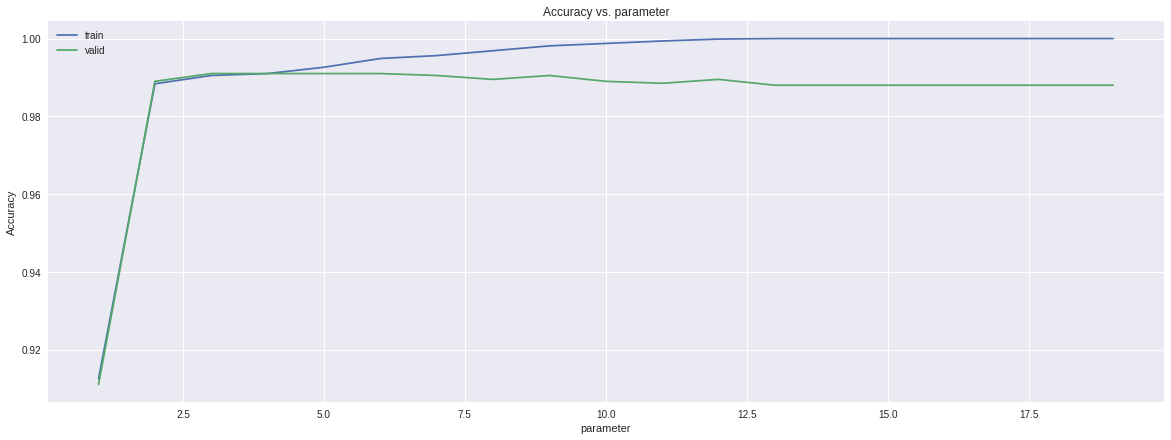

In [6]:
parameters = list(range(1, 20))
clf_num = 5
validation_graph(parameters, X_train, y_train, X_valid, y_valid, clf_num)

# Gaussian Naive Bayes

Best index 0
Best score 0.983


<Figure size 576x396 with 0 Axes>

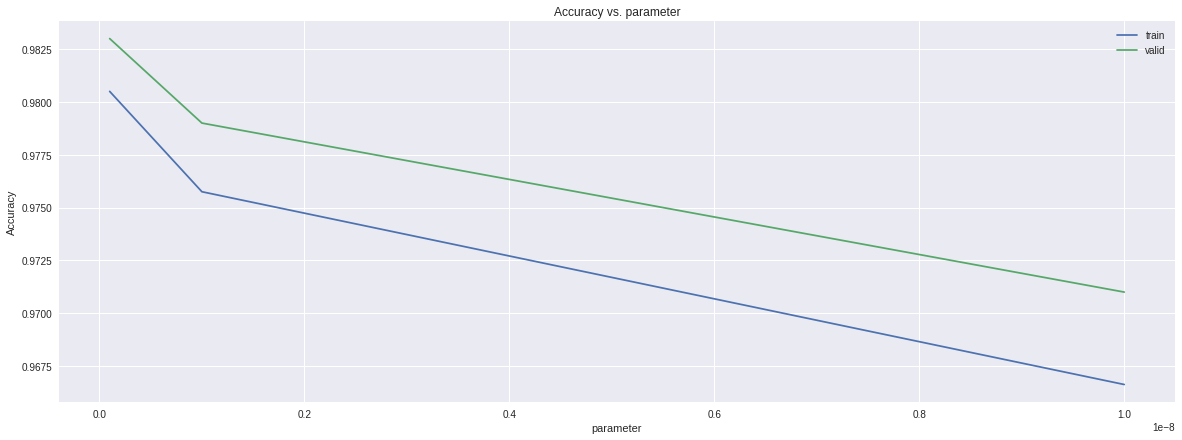

In [7]:
parameters = [1e-10, 1e-9, 1e-8]
clf_num = 2
validation_graph(parameters, X_train, y_train, X_valid, y_valid, clf_num)

# LDA

Best index 0
Best score 0.91


<Figure size 576x396 with 0 Axes>

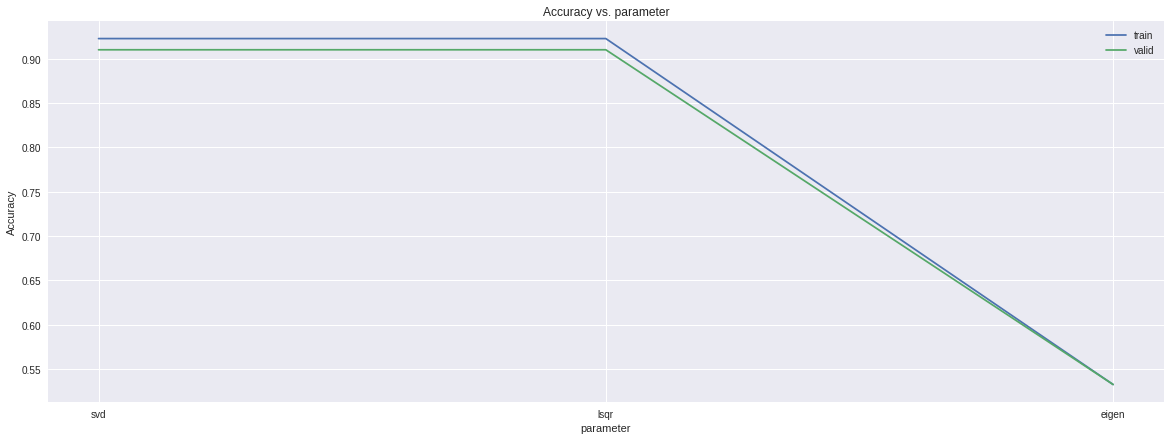

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
parameters = ['svd', 'lsqr', 'eigen']
clf_num = 3
validation_graph(parameters, X_train, y_train, X_valid, y_valid, clf_num)

# KNN

Best index 4
Best score 0.7775


<Figure size 576x396 with 0 Axes>

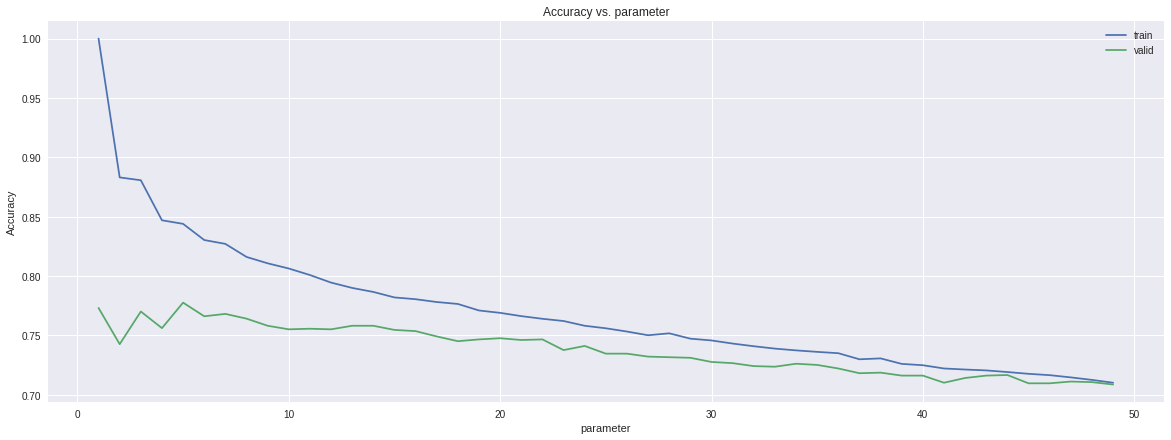

In [9]:
parameters = list(range(1, 50))
clf_num = 1
validation_graph(parameters, X_train, y_train, X_valid, y_valid, clf_num)

# Quadratic Discriminant Analysis

Best index 0
Best score 0.9885


<Figure size 576x396 with 0 Axes>

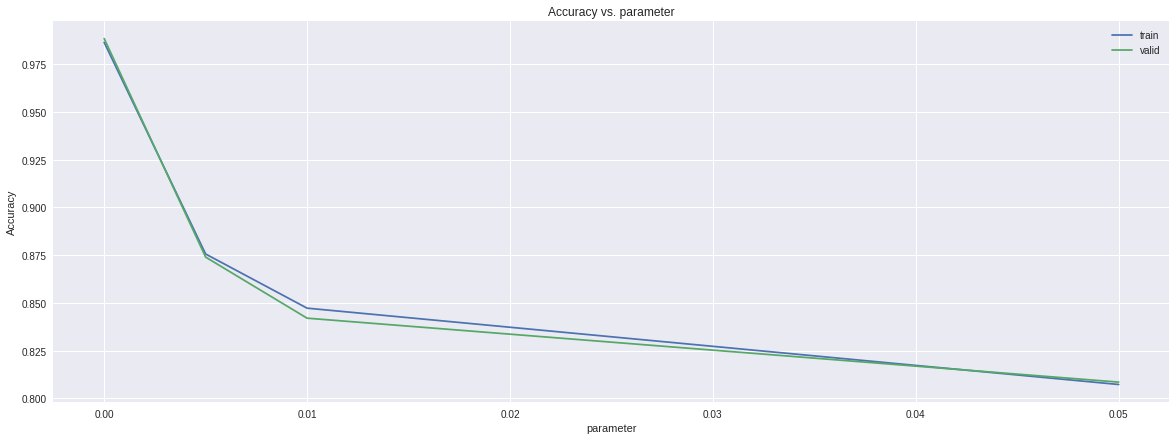

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
parameters = [0, 0.005, 0.01, 0.05]
clf_num = 4
validation_graph(parameters, X_train, y_train, X_valid, y_valid, clf_num)